## Описание набора данных

В этом соревновании мы классифицируем распространённые заболевания грудной клетки лёгких и локализуем критические признаки. Это задача на обнаружение и классификацию объектов.

Для каждого тестового изображения вы будете прогнозировать ограничивающую рамку и класс для всех результатов. Если вы прогнозируете отсутствие результатов, следует создать прогноз «14 1 0 0 1 1» (14 — это идентификатор класса, соответствующий отсутствию результатов, что обеспечивает ограничивающую рамку шириной в один пиксель с достоверностью 1,0).

Изображения имеют формат DICOM, что означает, что они содержат дополнительные данные, которые могут быть полезны для визуализации и классификации.

---

### Информация о наборе данных

Набор данных включает **18 000 рентгенограмм грудной клетки** в задне-передней проекции (ПЗП) в формате **DICOM**, которые были деперсонифицированы для защиты конфиденциальности пациентов.  
Все изображения были промаркированы группой опытных рентгенологов на предмет наличия **14 критических рентгенологических признаков**, перечисленных ниже:

- 0 — Aortic enlargement  
- 1 — Atelectasis  
- 2 — Calcification  
- 3 — Cardiomegaly  
- 4 — Consolidation  
- 5 — ILD  
- 6 — Infiltration  
- 7 — Lung Opacity  
- 8 — Nodule/Mass  
- 9 — Other lesion  
- 10 — Pleural effusion  
- 11 — Pleural thickening  
- 12 — Pneumothorax  
- 13 — Pulmonary fibrosis  
- 14 — No finding (отсутствие всех находок)

Наблюдение «Нет результатов» (14) было призвано зафиксировать отсутствие всех указанных выше результатов.  
Обратите внимание, что ключевой частью этого конкурса является работа с данными, полученными от нескольких рентгенологов.

---

### Файлы

- **train.csv** — метаданные тренировочного набора, содержащие по одной строке для каждого объекта, включая класс и ограничивающий прямоугольник.  
  Некоторые изображения как в тестовом, так и в тренировочном наборе содержат несколько объектов.  
- **sample_submission.csv** — файл образца отправки в правильном формате.

---

### Колонки в train.csv

- `image_id` — уникальный идентификатор изображения  
- `class_name` — наименование класса обнаруженного объекта (или «Не обнаружено»)  
- `class_id` — идентификатор класса обнаруженного объекта  
- `rad_id` — удостоверение личности рентгенолога, проводившего наблюдение  
- `x_min` — минимальная координата X ограничивающей рамки объекта  
- `y_min` — минимальная координата Y ограничивающей рамки объекта  
- `x_max` — максимальная координата X ограничивающего прямоугольника объекта  
- `y_max` — максимальная координата Y ограничивающего прямоугольника объекта


DICOM (Digital Imaging and Communications in Medicine) — это медицинский формат изображений, хранящий не только сам пиксельный снимок, но и встроенные метаданные

train.csv
Это основная таблица аннотаций, где каждая строка — это отдельный объект (bounding box) на изображении.
Если на одном снимке несколько находок (например, «Pleural effusion» и «Nodule»), то он встречается несколько раз.

sample_submission.csv
Файл-шаблон для финальной отправки на Kaggle.
Он нужен только чтобы понять формат вывода.

## План разведочного анализа данных (EDA)


### I. Анализ файла `train.csv`

**0. Сразу убрать пропуски и дубликаты, если есть**

**1. Общая характеристика данных**
- Определить количество разметок(=строк в csv) и уникальных снимков
- Количество радиологов (`rad_id`), какая-то аналитика по ним — ? Одинаково ли доверяем?
- Сколько обычно разметок на одном изображении?

**2. Исследование классов**
- Построить распределение по `class_name` и `class_id`
- Отдельно рассмотреть **"No finding"**
- Дисбаланс — ?

**3. Радиологи (????)**
- Нет ли смещения (например, один врач чаще указывает определённый диагноз) или наслоения
- Есть ли споры в разметках?

**4. Геометрия bounding boxes — не уверена**
- Изучить распределения ширины, высоты и площади рамок
- Визуализировать несколько изображений с разметкой
- Найти аномалии: нулевые, отрицательные или слишком маленькие координаты

---

### II. Анализ DICOM-метаданных

**0. Проверить, что исключили пропуски и дубликаты**

**1. Размерность изображений**
- Проверить значения `Rows` и `Columns`, определить, одинаковы ли размеры снимков

**2. Статистика пикселей**
- Посчитать минимум, максимум, среднее и стандартное отклонение интенсивности пикселей
- Проверить, есть ли отрицательные или пропущенные значения

**3. Изучение метаданных**
- Извлечь и рассмотреть поля
(вдруг мы имеем дело не только с рентгенами или у нас разные размеры/типы яркости)
https://habr.com/ru/articles/217761/
https://docs.exponenta.ru/images/read-metadata-from-dicom-files.html  

---

### III. Визуализация

- Показать изображения
---

### IV. Зависимости и закономерности

- Проверить совместную встречаемость диагнозов
- Сравнить статистики яркости и размеры боксов для разных классов — пока не надо?

---

### V. Выводы

- Нужны ли oversampling или взвешенные функции потерь
- Выводы по дубликатам и 2+ разметкам одного/разных классов на одном изображении


## Импорты

In [117]:
!pip install pydicom python-gdcm

In [118]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydicom
from tqdm import tqdm # Если долгий анализ, пригодится видеть процент
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Пути, константы

In [119]:
data_dir = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection"
train_csv_path = os.path.join(data_dir, "train.csv")
dicom_train_dir = os.path.join(data_dir, "train")

## I. Анализ файла `train.csv`

In [120]:
df = pd.read_csv(os.path.join(data_dir, "train.csv"))

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", font_scale=1.1)

df.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


### Дубликаты и пропуски

In [121]:
# 0
# Пропуски
print("Всего строк в train.csv (разметок) до удаления дубликатов:", len(df))
print("Количество пропусков по столбцам:")
print(df.isna().sum())

df_tmp = df.fillna(-1)
print("Количество дубликатов (с учетом NaN):", df_tmp.duplicated(
    subset=['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min', 'x_max', 'y_max']
).sum())
print("Уникальных строк:", len(df_tmp.drop_duplicates(
    subset=['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min', 'x_max', 'y_max']
)))

df = (df.fillna(-1)
        .drop_duplicates(subset=['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min', 'x_max', 'y_max'])
        .replace(-1, np.nan))

print("Всего строк в train.csv (разметок) после удаления дубликатов:", len(df))


Всего строк в train.csv (разметок) до удаления дубликатов: 67914
Количество пропусков по столбцам:
image_id          0
class_name        0
class_id          0
rad_id            0
x_min         31818
y_min         31818
x_max         31818
y_max         31818
dtype: int64
Количество дубликатов (с учетом NaN): 0
Уникальных строк: 67914
Всего строк в train.csv (разметок) после удаления дубликатов: 67914


### Общее

Уникальных снимков (image_id): 15000
Уникальных радиологов (rad_id): 17
Среднее количество разметок на снимок: 4.5276
Медиана количества разметок на снимок: 3.0
Максимум количества разметок на одном снимке: 57
Топ-10 изображений по количеству разметок:
image_id
03e6ecfa6f6fb33dfeac6ca4f9b459c9    57
fa109c087e46fe1ea27e48ce6d154d2f    52
e31be972e181987a8600a8700c1ebe88    48
ecf474d5d4f65d7a3e23370a68b8c6a0    46
3a302fbbbf3364aa1a7731b59e6b98ec    46
6d5acf3f8a973a26844d617fffe72998    46
c699f16ba0b86f474390da9515bcad7a    42
d8275cd2eabf34a7f7bf22bdd838bc70    40
498ac0c4815a890629cf509446a47238    39
dfd523a5991fc852654bf1235c6282c6    39
Name: class_id, dtype: int64


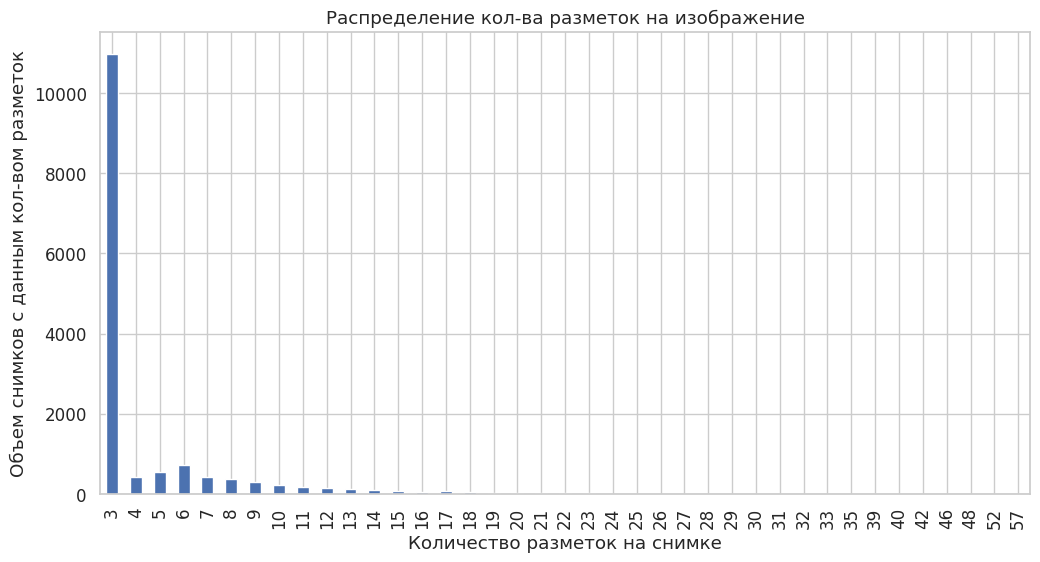

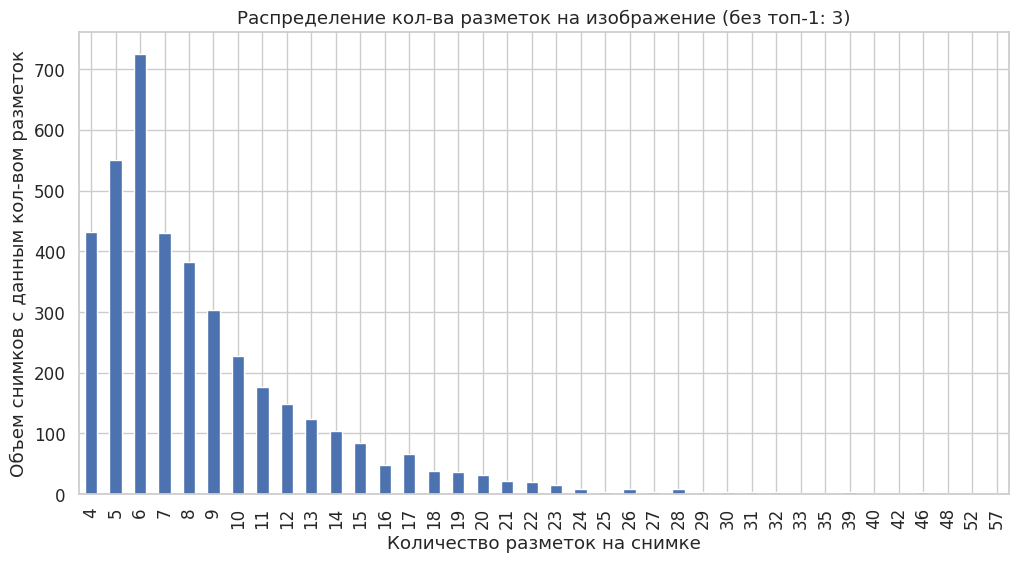

In [122]:
# 1
print("Уникальных снимков (image_id):", df["image_id"].nunique())
print("Уникальных радиологов (rad_id):", df["rad_id"].nunique())

# Группируем по id изображения
groups_by_images_id = df.groupby("image_id")["class_id"].count()
print("Среднее количество разметок на снимок:", groups_by_images_id.mean())
print("Медиана количества разметок на снимок:", groups_by_images_id.median())
print("Максимум количества разметок на одном снимке:", groups_by_images_id.max()) # 57 — выпад? (похоже нет)

top10 = groups_by_images_id.sort_values(ascending=False).head(10)
print("Топ-10 изображений по количеству разметок:")
print(top10)

# Распределение кол-ва разметок на изображение
plt.figure(figsize=(12,6))
groups_by_images_id.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Количество разметок на снимке")
plt.ylabel("Объем снимков с данным кол-вом разметок")
plt.title("Распределение кол-ва разметок на изображение")
plt.show()

# То же самое без топ-1
counts = groups_by_images_id.value_counts().sort_index()
exclude = counts.sort_values(ascending=False).index[0]  # Индекс самого частого
counts = counts.drop(exclude)

plt.figure(figsize=(12,6))
counts.plot(kind="bar")
plt.xlabel("Количество разметок на снимке")
plt.ylabel("Объем снимков с данным кол-вом разметок")
plt.title(f"Распределение кол-ва разметок на изображение (без топ-1: {exclude})")
plt.show()

### Анализ классов

class_name
No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: count, dtype: int64


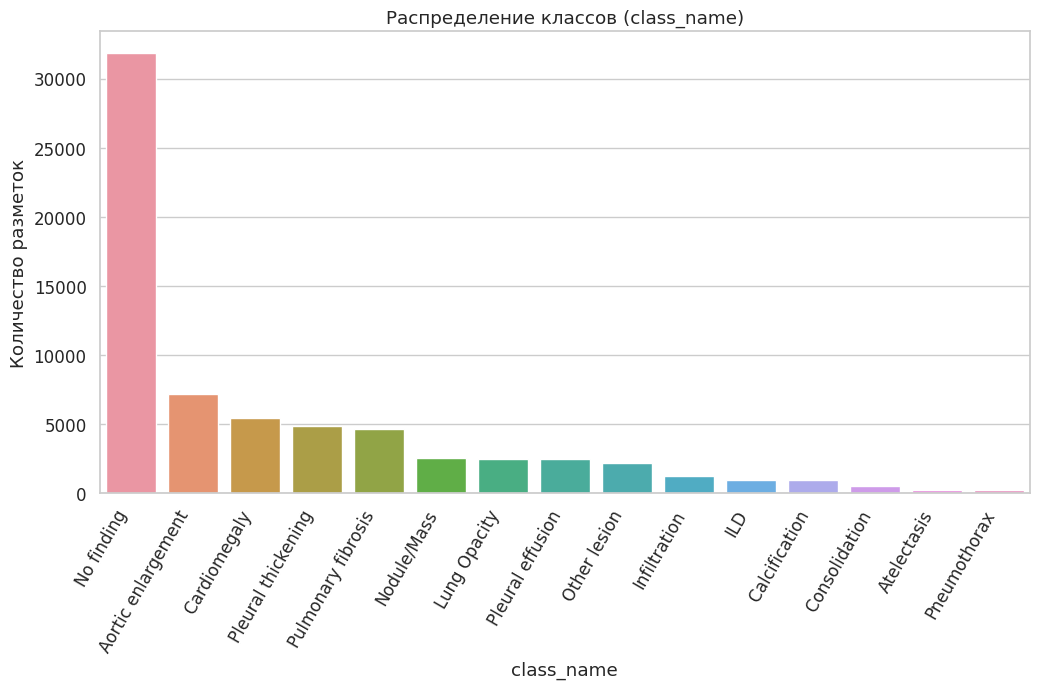

class_id/count: class_id
0      7162
1       279
2       960
3      5427
4       556
5      1000
6      1247
7      2483
8      2580
9      2203
10     2476
11     4842
12      226
13     4655
14    31818
Name: count, dtype: int64


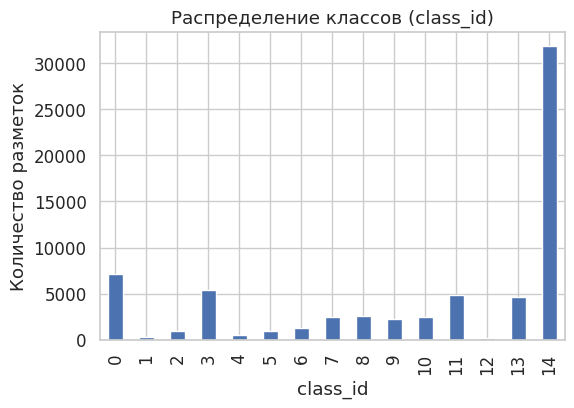

Количествово строк с 'No finding': 34398
Доля 'No finding': 0.5064935064935064


In [123]:
# 2
# Распределение по классам (class_name)
class_counts = df["class_name"].value_counts().sort_values(ascending=False)
print(class_counts)

plt.figure(figsize=(12,6))
sns.barplot( # Пыталась в красоту, оно нам надо?
    x=class_counts.index,
    y=class_counts.values
)
plt.xticks(rotation=60, ha="right")
plt.ylabel("Количество разметок")
plt.title("Распределение классов (class_name)")
plt.show()

# То же самое по ID 
class_id_counts = df["class_id"].value_counts().sort_index()
print("class_id/count:", class_id_counts)

plt.figure(figsize=(6,4))
class_id_counts.plot(kind="bar")
plt.xlabel("class_id")
plt.ylabel("Количество разметок")
plt.title("Распределение классов (class_id)")
plt.show()

no_finding_mask = df["class_name"].str.lower().str.contains("no", na=False)
print("Количествово строк с 'No finding':", no_finding_mask.sum())
print("Доля 'No finding':", no_finding_mask.mean())

In [124]:
class_table = (
    df["class_name"]
    .value_counts()
    .sort_values(ascending=False)
    .rename_axis("Класс")
    .reset_index(name="Количество")
)
class_table["Доля, %"] = (class_table["Количество"] / class_table["Количество"].sum() * 100).round(2)

display(class_table)

,Класс,Количество,"Доля, %"
0,No finding,31818,46.85
1,Aortic enlargement,7162,10.55
2,Cardiomegaly,5427,7.99
3,Pleural thickening,4842,7.13
4,Pulmonary fibrosis,4655,6.85
5,Nodule/Mass,2580,3.80
6,Lung Opacity,2483,3.66
7,Pleural effusion,2476,3.65
8,Other lesion,2203,3.24
9,Infiltration,1247,1.84


### Отдельно рассмотрим ситуацию, когда на одном снимке один и тот же класс в разных местах
- для каких классов это характерно, частота и тд

Всего случаев, где один и тот же класс размечен несколько раз на одном снимке: 9975
Уникальных снимков с такими случаями: 4365


,class_name,num_images_with_multi,avg_repeats_per_image,total_images_with_class
0,Aortic enlargement,2347,2.74,3067
1,Cardiomegaly,1818,2.72,2300
2,Pleural thickening,1252,3.29,1981
3,Pulmonary fibrosis,1141,3.66,1617
4,Pleural effusion,705,3.05,1032
5,Lung Opacity,657,2.77,1322
6,Nodule/Mass,501,4.50,826
7,Other lesion,478,3.24,1134
8,Infiltration,337,2.88,613
9,ILD,263,3.33,386


,class_name,percent_multi_within_class_%
0,Aortic enlargement,76.52
1,Cardiomegaly,79.04
2,Pleural thickening,63.20
3,Pulmonary fibrosis,70.56
4,Pleural effusion,68.31
5,Lung Opacity,49.70
6,Nodule/Mass,60.65
7,Other lesion,42.15
8,Infiltration,54.98
9,ILD,68.13


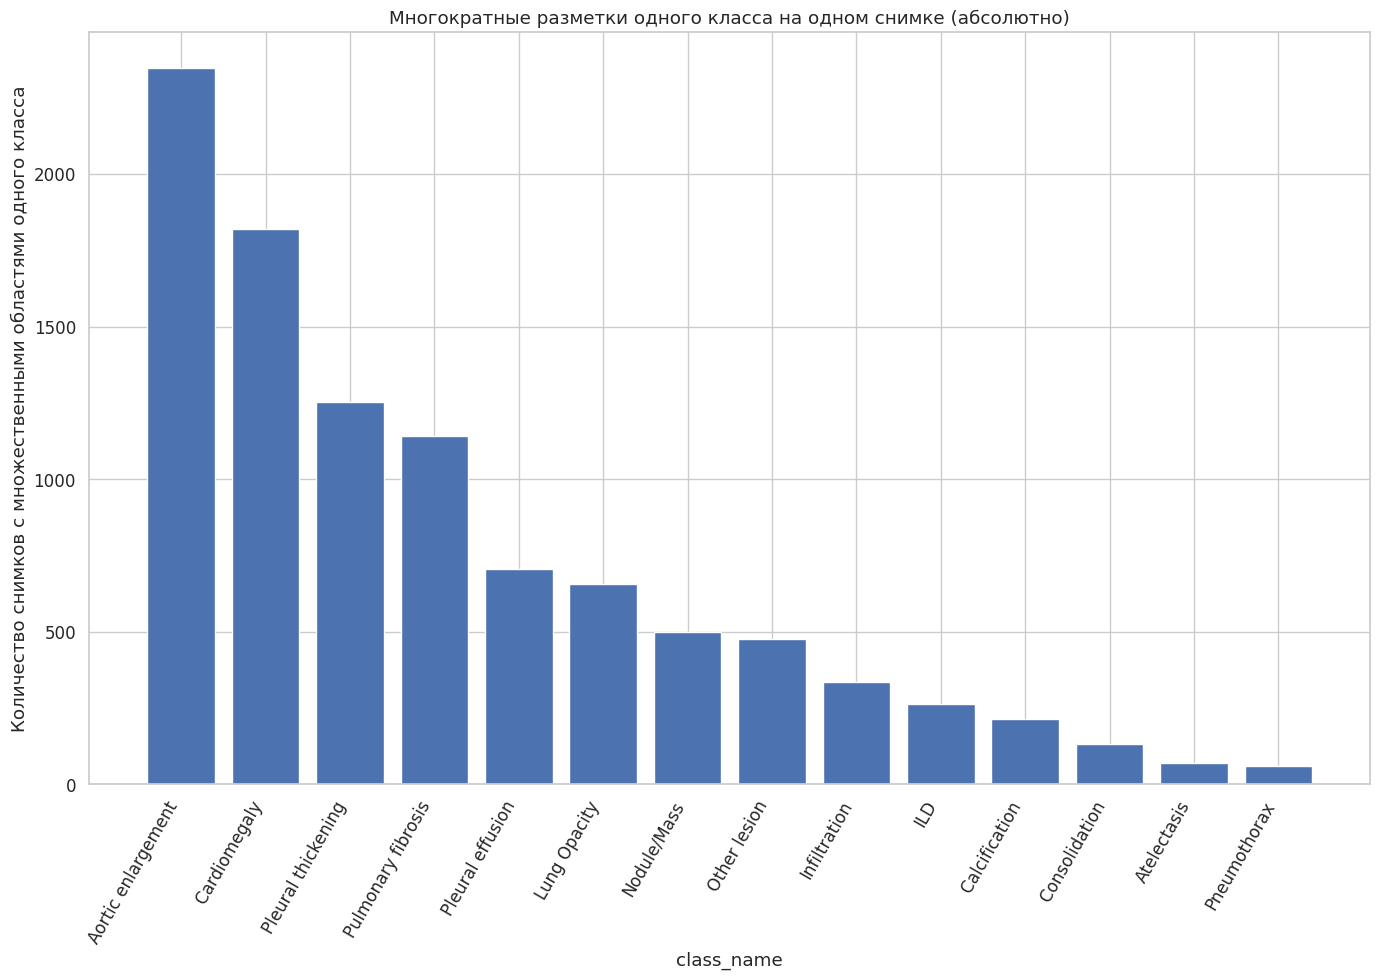

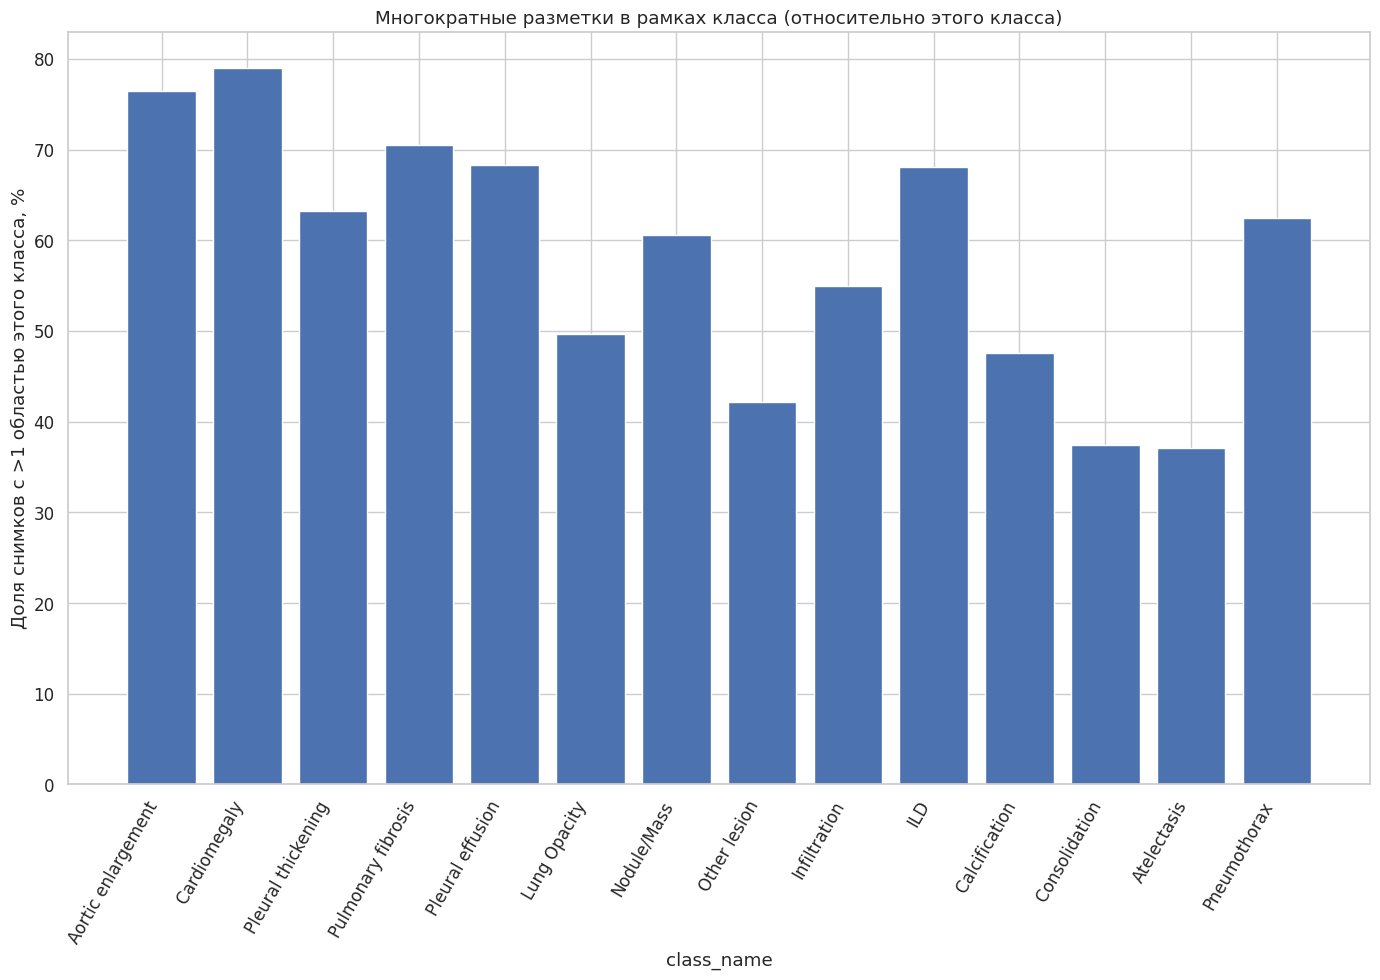

In [125]:
id2name = (
    df[["class_id", "class_name"]]
    .drop_duplicates()
    .set_index("class_id")["class_name"]
)

df_same_class = (
    df[df["class_name"] != "No finding"] # Не забыть убрать из анализа No finding
    .groupby(["image_id", "class_id"])
    .size()
    .reset_index(name="count")
    .query("count > 1")
)

print("Всего случаев, где один и тот же класс размечен несколько раз на одном снимке:", len(df_same_class))
print("Уникальных снимков с такими случаями:", df_same_class["image_id"].nunique())

# Cчитаем сколько таких снимков на класс
multi_per_class = (
    df_same_class
    .groupby("class_id")["image_id"]
    .nunique()
    .rename("num_images_with_multi")
    .reset_index()
)

# Cреднее число повторений на одном снимке для класса
avg_repeats = (
    df_same_class
    .groupby("class_id")["count"]
    .mean()
    .round(2)
    .rename("avg_repeats_per_image")
    .reset_index()
)

# Cколько всего снимков вообще имеют этот класс
images_with_class = (
    df[df["class_name"] != "No finding"]
    .groupby(["class_id", "image_id"])
    .size()
    .reset_index()
    .groupby("class_id")["image_id"]
    .nunique()
    .rename("total_images_with_class")
    .reset_index()
)

# Jбъединяем всё
stats_abs = (
    multi_per_class
    .merge(avg_repeats, on="class_id", how="left")
    .merge(images_with_class, on="class_id", how="left")
)

# Lобавим имя класса
stats_abs["class_name"] = stats_abs["class_id"].map(id2name)

# Отсортируем по num_images_with_multi
stats_abs = stats_abs.sort_values("num_images_with_multi", ascending=False)

# Процент снимков данного класса, где их больше одной области
stats_abs["percent_multi_within_class_%"] = (
    stats_abs["num_images_with_multi"] / stats_abs["total_images_with_class"] * 100
).round(2)

# Абсолютные значения
table_abs = stats_abs[[
    "class_name",
    "num_images_with_multi",
    "avg_repeats_per_image",
    "total_images_with_class"
]].reset_index(drop=True)

display(table_abs)

# Относительные значения
table_rel = stats_abs[[
    "class_name",
    "percent_multi_within_class_%"
]].reset_index(drop=True)

display(table_rel)

# Сколько снимков на класс с несколькими областями
plt.figure(figsize=(14,10))
plt.bar(table_abs["class_name"], table_abs["num_images_with_multi"])
plt.xticks(rotation=60, ha="right")
plt.xlabel("class_name")
plt.ylabel("Количество снимков с множественными областями одного класса")
plt.title("Многократные разметки одного класса на одном снимке (абсолютно)")
plt.tight_layout()
plt.show()

# Процент в рамках класса
plt.figure(figsize=(14,10))
plt.bar(table_rel["class_name"], table_rel["percent_multi_within_class_%"])
plt.xticks(rotation=60, ha="right")
plt.xlabel("class_name")
plt.ylabel("Доля снимков с >1 областью этого класса, %")
plt.title("Многократные разметки в рамках класса (относительно этого класса)")
plt.tight_layout()
plt.show()


### Анализ по радиологам

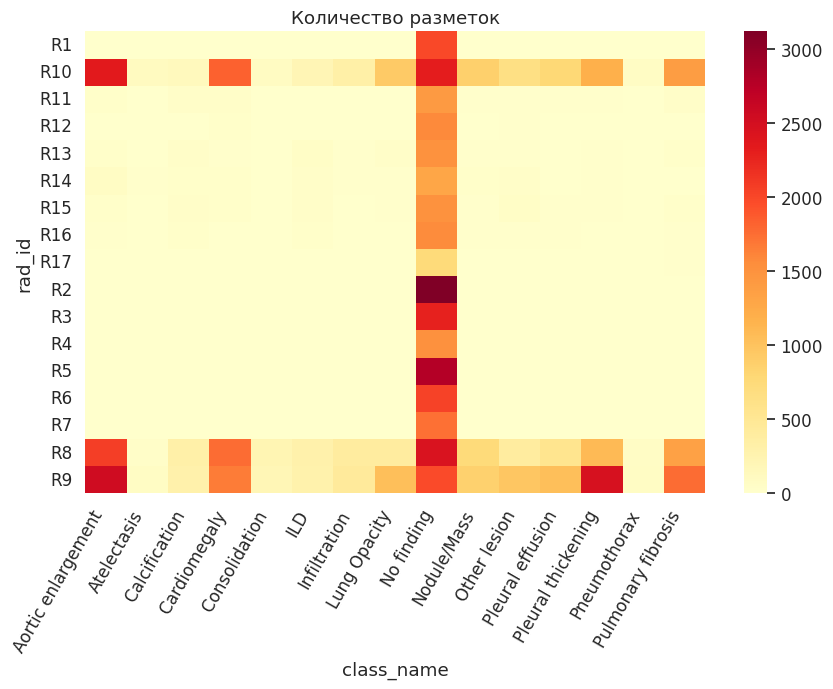

class_name,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,No finding,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
rad_id,,,,,,,,,,,,,,,
R1,0,0,0,0,0,0,0,0,1995,0,0,0,0,0,0
R10,2349,115,139,1835,91,218,338,929,2321,866,650,790,1186,74,1391
R11,30,6,46,41,7,10,0,12,1413,16,15,14,19,1,40
R12,12,8,11,28,2,9,9,4,1580,12,19,12,10,1,12
R13,32,10,39,20,9,49,22,39,1505,18,22,8,15,1,35


,rad_id,Количество разметок,"Доля, %"
0,R9,15708,23.13
1,R10,13292,19.57
2,R8,12198,17.96
3,R2,3121,4.60
4,R5,2783,4.10
5,R3,2285,3.36
6,R6,2041,3.01
7,R1,1995,2.94
8,R13,1824,2.69
9,R15,1823,2.68


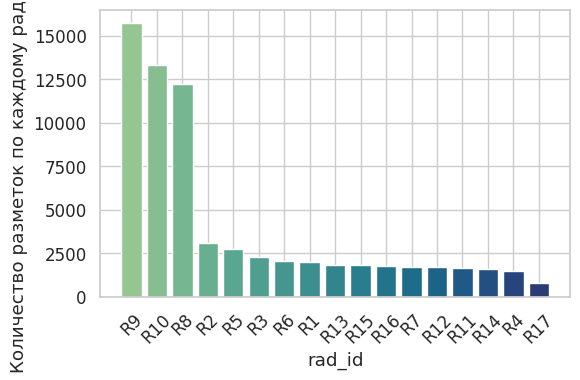

In [126]:
# 3
# Сколько раз каждый радиолог ставил каждый класс
rad_class_num = pd.crosstab(df["rad_id"], df["class_name"])

plt.figure(figsize=(10,6))
sns.heatmap(rad_class_num, cmap="YlOrRd", cbar=True)
plt.title("Количество разметок")
plt.ylabel("rad_id")
plt.xlabel("class_name")
plt.xticks(rotation=60, ha="right")
plt.yticks(rotation=0)
plt.show()

display(rad_class_num.head())

# Разметки по радиологам
rad_counts = df["rad_id"].value_counts().sort_values(ascending=False)
rad_percent = (rad_counts / rad_counts.sum() * 100).round(2)

rad_table = (
    pd.DataFrame({
        "Количество разметок": rad_counts,
        "Доля, %": rad_percent
    })
    .reset_index()
    .rename(columns={"index": "rad_id"})
)

display(rad_table)

plt.figure(figsize=(6,4))
plt.bar(rad_table["rad_id"], rad_table["Количество разметок"], color=sns.color_palette("crest", len(rad_table)))
plt.xlabel("rad_id")
plt.ylabel("Количество разметок по каждому радиологу")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [127]:
# Сгруппируем: какие радиологи и какие диагнозы поставлены
rad_agreement = (
    df.groupby("image_id")
    .agg({
        "rad_id": "nunique",
        "class_name": lambda x: tuple(sorted(x.unique()))
    })
    .rename(columns={"rad_id": "unique_rads", "class_name": "classes"})
    .reset_index()
)

# Где участвовало >1 радиолога
multi_rad = rad_agreement[rad_agreement["unique_rads"] > 1].copy()

# Совпадают ли диагнозы для одного и того же изображения
agreement_check = (
    df.groupby(["image_id", "rad_id"])["class_name"]
    .apply(lambda x: tuple(sorted(x.unique())))
    .reset_index()
)

# Различные менния по одному снимку
opinions = (
    agreement_check.groupby("image_id")["class_name"]
    .nunique()
    .reset_index(name="distinct_opinions")
)

agreement_summary = multi_rad.merge(opinions, on="image_id", how="left")

# Где радиологи не совпали в диагнозах
disagree = agreement_summary[agreement_summary["distinct_opinions"] > 1]
agree = agreement_summary[agreement_summary["distinct_opinions"] == 1]

print("Снимков, размеченных несколькими радиологами: ", len(multi_rad))
print("Из них с совпадающими диагнозами: ", len(agree))
print("С разными диагнозами: ", len(disagree))
print("Доля совпадений: ", round(len(agree) / len(multi_rad) * 100, 2), "%")

display(disagree.head())

Снимков, размеченных несколькими радиологами:  15000
Из них с совпадающими диагнозами:  11317
С разными диагнозами:  3683
Доля совпадений:  75.45 %


,image_id,unique_rads,classes,distinct_opinions
2,0005e8e3701dfb1dd93d53e2ff537b6e,3,"(Consolidation, Infiltration, Lung Opacity, No...",3
4,0007d316f756b3fa0baea2ff514ce945,3,"(Aortic enlargement, Cardiomegaly, ILD, Pleura...",3
6,000d68e42b71d3eac10ccc077aba07c1,3,"(Aortic enlargement, Lung Opacity, Other lesio...",3
7,00150343289f317a0ad5629d5b7d9ef9,3,"(Aortic enlargement, Cardiomegaly, Lung Opacit...",3
9,001d127bad87592efe45a5c7678f8b8d,3,"(Calcification, Pulmonary fibrosis)",2


### IV. Зависимости и закономерности
***Проверим совместную встречаемость диагнозов, корелляции***

('Aortic enlargement', 'Cardiomegaly') - 709 изображений
('Aortic enlargement', 'Cardiomegaly', 'Pleural thickening') - 224 изображений
('Aortic enlargement', 'Cardiomegaly', 'Pulmonary fibrosis') - 75 изображений
('Aortic enlargement', 'Pleural thickening') - 69 изображений
('Aortic enlargement', 'Cardiomegaly', 'Other lesion') - 55 изображений
('Aortic enlargement', 'Cardiomegaly', 'Pleural effusion', 'Pleural thickening') - 51 изображений
('Pleural thickening', 'Pulmonary fibrosis') - 50 изображений
('Aortic enlargement', 'Cardiomegaly', 'Pleural thickening', 'Pulmonary fibrosis') - 41 изображений
('Aortic enlargement', 'Cardiomegaly', 'Lung Opacity') - 39 изображений
('Aortic enlargement', 'Pulmonary fibrosis') - 38 изображений


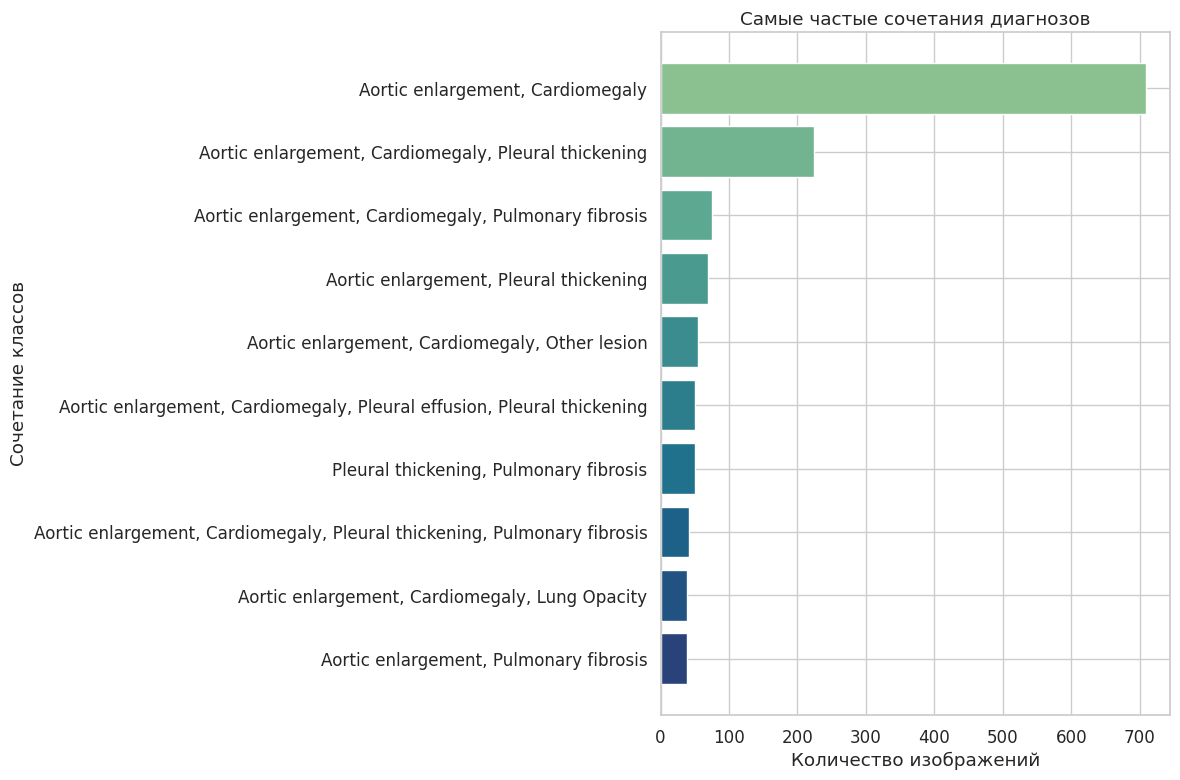

In [128]:
# Убираем "No finding"
df_no_nf = df[df["class_name"] != "No finding"].copy()

# Для каждого снимка собираем диагнозы, отсортированные по имени
class_combinations = (
    df_no_nf.groupby("image_id")["class_name"]
    .agg(lambda x: tuple(sorted(x.unique())))
)

# Сколько раз встретилась каждая комбинация
class_combination_counts = (
    class_combinations.value_counts()
    .reset_index()
)

class_combination_counts.columns = ["combination", "count"]

class_combination_counts["num_classes"] = class_combination_counts["combination"].apply(len)

# >= 2 диагнозов
class_combination_counts = class_combination_counts[class_combination_counts["num_classes"] >= 2]

top_class_combinations = class_combination_counts.head(10)

for idx, row in top_class_combinations.iterrows():
    print(f"{row['combination']} - {row['count']} изображений")

plt.figure(figsize=(12, 8))
plt.barh(
    [", ".join(comb) for comb in top_class_combinations["combination"]],
    top_class_combinations["count"],
    color=sns.color_palette("crest", len(top_class_combinations))
)
plt.xlabel("Количество изображений")
plt.ylabel("Сочетание классов")
plt.title("Самые частые сочетания диагнозов")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


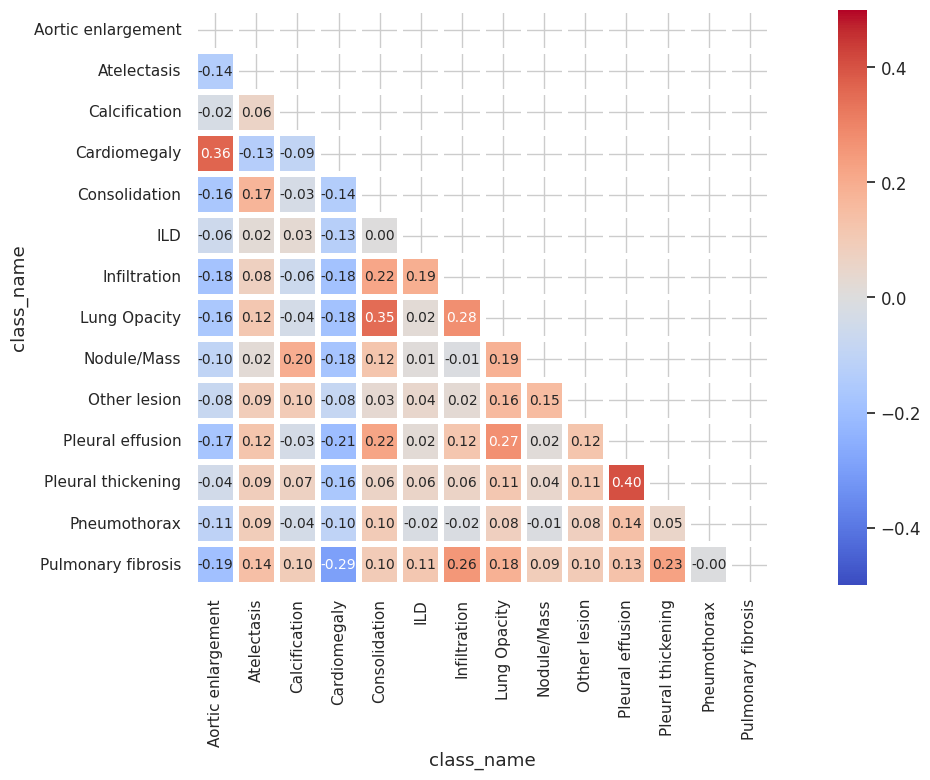

In [129]:
# Убираем "No finding"
df_no_nf = df[df["class_name"] != "No finding"].copy()

class_presence = (
    pd.crosstab(df_no_nf["image_id"], df_no_nf["class_name"])
    .clip(upper=1)
)

# Корреляция между классами
class_corr = class_presence.corr()

# Треугольник
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

mask = np.zeros_like(class_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(
    class_corr,
    annot=True,
    fmt=".2f",
    square=True,
    mask=mask,
    linewidth=3,
    vmax=0.5, vmin=-0.5,
    cmap=cmap,
    cbar=True,
    ax=ax,
    annot_kws={"size": 10}
)


ax.set_yticklabels(ax.get_xticklabels(), rotation=0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=11)

plt.tight_layout()
plt.show()
